# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy
!conda install -c conda-forge gmaps
!jupyter nbextension enable --py gmaps




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.0

Please update conda by running

    $ conda update -n base conda





Solving environment: ...working... done

# All requested packages already installed.



Config option `kernel_spec_manager_class` not recognized by `EnableNBExtensionApp`.
Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [2]:
# Dependencies
import os
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint
from citipy import citipy
import gmaps
import gmaps.datasets
import numpy as np

# Citipy & gmaps API Keys
from api_keys import (weather_api_key, gkey)

# Configure gmaps
gmaps.configure(api_key=gkey)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lon = []
cities = []

# Create a set of random lat and lon combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lon = zip(lats, lons)

# Identify nearest city for each lat, lng combination
for lat_lon in lat_lon:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name_list = []
city_id_list =[]
country_list = []
lat_list = []
lon_list = []

cloudiness_list = []
date_list = []
humidity_list = []
date_temp_list = []
max_temp_list = []
wind_speed_list = []

index_counter = 0


In [5]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()

        city_name_list.append(response["name"])
        city_id_list.append(response["id"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lon_list.append(response["coord"]["lon"])
        date_temp_list.append(response['main']['temp'])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 : puerto ayora
Processing Record 2 : ushuaia
City not found. Skipping...
Processing Record 3 : nishihara
Processing Record 4 : te anau
Processing Record 5 : rikitea
Processing Record 6 : victoria
Processing Record 7 : albany
Processing Record 8 : barrow
Processing Record 9 : grants
Processing Record 10 : nechi
City not found. Skipping...
Processing Record 11 : linjiang
Processing Record 12 : linxia
Processing Record 13 : atuona
Processing Record 14 : buchanan
City not found. Skipping...
Processing Record 15 : rawson
Processing Record 16 : san patricio
Processing Record 17 : amga
Processing Record 18 : saint-leu
City not found. Skipping...
Processing Record 19 : tasiilaq
Processing Record 20 : hobart
Processing Record 21 : bluff
Processing Record 22 : beira
Processing Record 23 : barranca
Processing Record 24 : new norfolk
Processing Record 25 : upernavik
City not found. Skipping...
Processing Record 26 : avarua

Processing Record 232 : severo-kurilsk
Processing Record 233 : alofi
Processing Record 234 : tiksi
City not found. Skipping...
Processing Record 235 : krasnopillya
Processing Record 236 : bowen
City not found. Skipping...
Processing Record 237 : winneba
Processing Record 238 : eydhafushi
Processing Record 239 : kovdor
Processing Record 240 : shimoda
Processing Record 241 : wanaka
Processing Record 242 : kayerkan
Processing Record 243 : egvekinot
Processing Record 244 : daru
Processing Record 245 : fairbanks
City not found. Skipping...
Processing Record 246 : umm lajj
Processing Record 247 : oranjemund
City not found. Skipping...
Processing Record 248 : waitati
Processing Record 249 : huarmey
Processing Record 250 : denpasar
Processing Record 251 : port hardy
Processing Record 252 : san alberto
Processing Record 253 : kyra
Processing Record 254 : yasnogorsk
Processing Record 255 : mandan
Processing Record 256 : mount clemens
Processing Record 257 : namibe
Processing Record 258 : kahului

Processing Record 463 : nekhayevskiy
Processing Record 464 : sambava
Processing Record 465 : conceicao do araguaia
Processing Record 466 : amahai
City not found. Skipping...
Processing Record 467 : ust-tsilma
Processing Record 468 : christchurch
Processing Record 469 : sawakin
Processing Record 470 : jacksonville
Processing Record 471 : northam
Processing Record 472 : tadine
Processing Record 473 : puerto quijarro
Processing Record 474 : tortoman
Processing Record 475 : myaundzha
Processing Record 476 : kurgunta
Processing Record 477 : havoysund
Processing Record 478 : seoul
Processing Record 479 : louga
Processing Record 480 : novobirilyussy
Processing Record 481 : rafai
Processing Record 482 : port hedland
Processing Record 483 : hambantota
Processing Record 484 : cervo
Processing Record 485 : puro
City not found. Skipping...
Processing Record 486 : port macquarie
Processing Record 487 : kabo
Processing Record 488 : peace river
City not found. Skipping...
Processing Record 489 : zhig

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_cities = pd.DataFrame({ 
                "City" : city_name_list,
                "City ID": city_id_list,
                "Country" : country_list,
                "Latitute" : lat_list,
                "Longitute" : lon_list,
                "Date" : date_list,
                "Cloudiness" : cloudiness_list,
                "Humidity" : humidity_list,
                "Temp at Date" : date_temp_list,
                "Max Temp to Date":max_temp_list, 
                "Wind Speed" : wind_speed_list })

weather_cities

,City,City ID,Country,Latitute,Longitute,Date,Cloudiness,Humidity,Temp at Date,Max Temp to Date,Wind Speed
0,Puerto Ayora,3652764,EC,-0.74,-90.35,1603073714,100,91,70.00,70.00,5.99
1,Ushuaia,3833367,AR,-54.80,-68.30,1603073425,75,69,39.20,39.20,10.29
2,Nishihara,1855342,JP,26.18,127.76,1603073715,40,69,82.40,82.40,10.29
3,Te Anau,2181625,NZ,-45.42,167.72,1603073715,100,90,44.37,44.37,1.57
4,Rikitea,4030556,PF,-23.12,-134.97,1603073705,100,81,74.68,74.68,17.36
...,...,...,...,...,...,...,...,...,...,...,...
562,Andros,265040,GR,37.83,24.93,1603073845,2,70,69.01,69.01,1.99
563,Asău,686090,RO,46.43,26.40,1603073783,27,100,46.20,46.40,4.70
564,Natchez,4437982,US,31.56,-91.40,1603073845,90,88,70.72,71.60,5.82
565,Naraini,1261871,IN,25.18,80.48,1603073845,0,54,80.20,80.20,3.09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_cities_underhumid100 = weather_cities.loc[(weather_cities["Humidity"] <= 100)]

weather_cities_underhumid100

,City,City ID,Country,Latitute,Longitute,Date,Cloudiness,Humidity,Temp at Date,Max Temp to Date,Wind Speed
0,Puerto Ayora,3652764,EC,-0.74,-90.35,1603073714,100,91,70.00,70.00,5.99
1,Ushuaia,3833367,AR,-54.80,-68.30,1603073425,75,69,39.20,39.20,10.29
2,Nishihara,1855342,JP,26.18,127.76,1603073715,40,69,82.40,82.40,10.29
3,Te Anau,2181625,NZ,-45.42,167.72,1603073715,100,90,44.37,44.37,1.57
4,Rikitea,4030556,PF,-23.12,-134.97,1603073705,100,81,74.68,74.68,17.36
...,...,...,...,...,...,...,...,...,...,...,...
562,Andros,265040,GR,37.83,24.93,1603073845,2,70,69.01,69.01,1.99
563,Asău,686090,RO,46.43,26.40,1603073783,27,100,46.20,46.40,4.70
564,Natchez,4437982,US,31.56,-91.40,1603073845,90,88,70.72,71.60,5.82
565,Naraini,1261871,IN,25.18,80.48,1603073845,0,54,80.20,80.20,3.09


In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_cities_overhumid100 = weather_cities.loc[(weather_cities["Humidity"] > 100)]

weather_cities_overhumid100

,City,City ID,Country,Latitute,Longitute,Date,Cloudiness,Humidity,Temp at Date,Max Temp to Date,Wind Speed


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

quartiles = weather_cities_underhumid100["Humidity"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
        
weather_cities_cleandata = weather_cities_underhumid100 = weather_cities.loc[(weather_cities["Humidity"] > lower_bound)
                                                                             |(weather_cities["Humidity"] < upper_bound) ]
weather_cities_cleandata

# Save city data into a csv file
weather_cities_cleandata.to_csv("../output_data/cities.csv", index = False, header=True)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

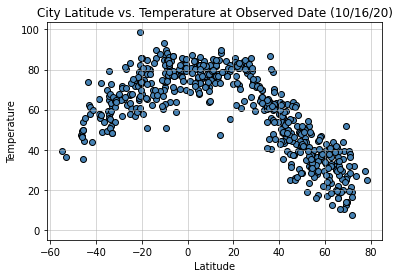

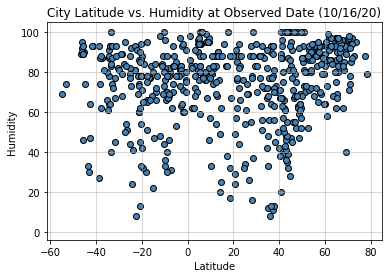

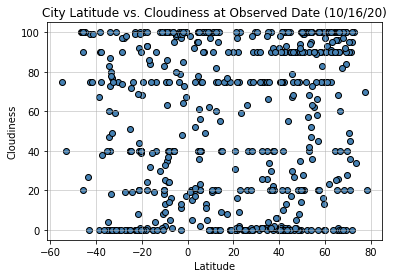

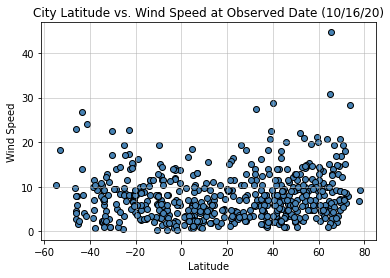

In [97]:
# loop to run plots of latitute vs Temperature, Humidity,Cloudiness & Wind Speed

x = weather_cities_cleandata["Latitute"]
y = [weather_cities_cleandata["Temp at Date"],weather_cities_cleandata["Humidity"],
     weather_cities_cleandata["Cloudiness"],weather_cities_cleandata["Wind Speed"]]
variable =["Temperature","Humidity","Cloudiness","Wind Speed"]

for n in range(len(y)):
        
        fig = plt.figure()  
        
        plt.scatter(x, y[n], facecolor = "steelblue", edgecolor = "black")
        
        # Set title
        plt.title(f"City Latitude vs. {variable[n]} at Observed Date (10/16/20)")

        # Set x axis label
        plt.xlabel("Latitude")

        # Set y axis label
        plt.ylabel(f"{variable[n]}")

        # Set grid line
        plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

        plt.plot(n)
        plt.show()
        
        # Save the plotted figure as .pngs
        fig.savefig("../Images/Graph" + " " + str(variable[n]) + " vs City Latitude" + ".png", format="PNG")
       

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [83]:
def linear_agression(x,y):
            print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
            (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
            regress_values = x * slope + intercept
            line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
            plt.scatter(x, y)
            plt.plot(x,regress_values,"r-")
            return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
            plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [104]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_cities_cleandata.loc[weather_cities_cleandata["Latitute"] >= 0,:]
southern_hemisphere = weather_cities_cleandata.loc[weather_cities_cleandata["Latitute"] < 0,:]

x = [northern_hemisphere["Latitute"],southern_hemisphere["Latitute"]]

y_north = [northern_hemisphere["Max Temp to Date"],northern_hemisphere["Humidity"],
           northern_hemisphere["Cloudiness"],northern_hemisphere["Wind Speed"]]

y_south = [southern_hemisphere["Max Temp to Date"],southern_hemisphere["Humidity"],
           southern_hemisphere["Cloudiness"],southern_hemisphere["Wind Speed"]]

variable_ln =["Max Temperature","Humidity","Cloudiness","Wind Speed"]

The r-squared is : -0.89


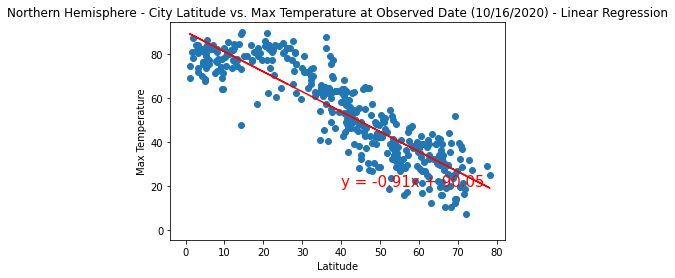

The r-squared is : 0.16


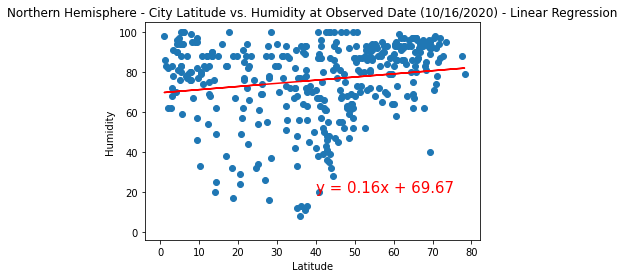

The r-squared is : 0.17


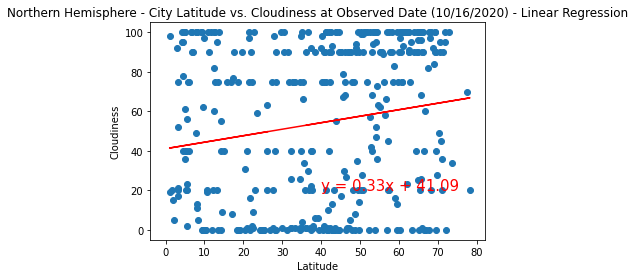

The r-squared is : 0.26


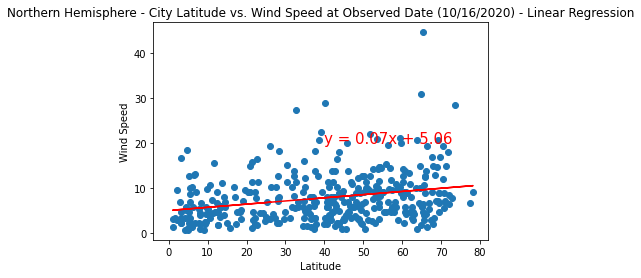

In [112]:
 for n in range(len(y_north)):
        
        fig = plt.figure()
        
        # Call an function #1
        equation = linear_agression(x[0], y_north[n])

        # Call an function #2
        annotate(equation, 40, 20)

        # Set a title
        plt.title(f"Northern Hemisphere - City Latitude vs. {variable_ln[n]} at Observed Date (10/16/2020) - Linear Regression")

        # Set xlabel
        plt.xlabel("Latitude")

        # Set ylabel
        plt.ylabel(f"{variable_ln[n]}")

        plt.plot(n)
        plt.show()

        # Save the figure
        fig.savefig("../Images/Linear Regression" + " " + str(variable_ln[n]) + " vs North_City Latitude" + ".png", format="PNG")

        
        

The r-squared is : 0.7


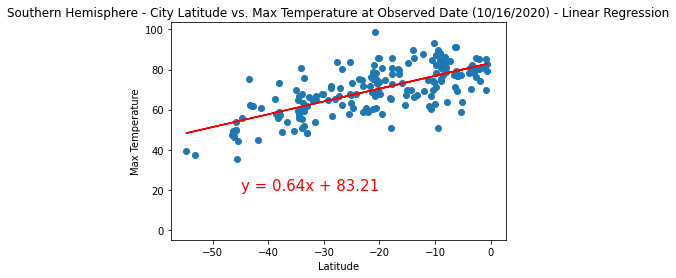

The r-squared is : -0.06


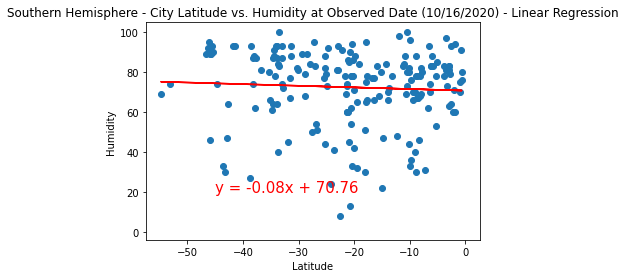

The r-squared is : -0.02


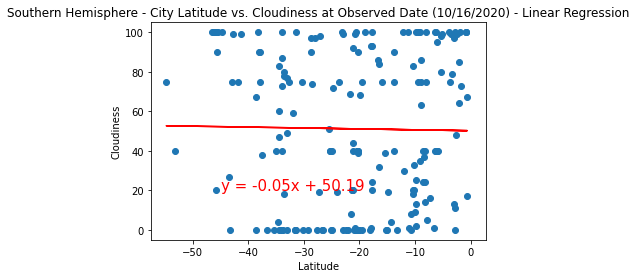

The r-squared is : -0.13


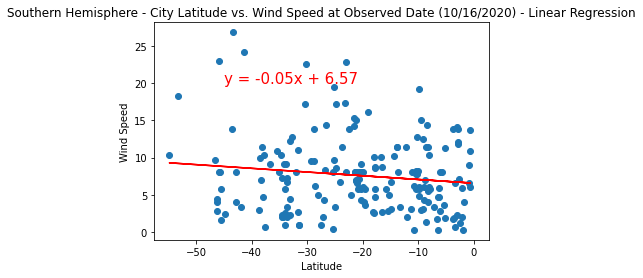

In [113]:
for n in range(len(y_north)):
        
        fig = plt.figure()
        
        # Call an function #1
        equation = linear_agression(x[1], y_south[n])

        # Call an function #2
        annotate(equation, -45, 20)

        # Set a title
        plt.title(f"Southern Hemisphere - City Latitude vs. {variable_ln[n]} at Observed Date (10/16/2020) - Linear Regression")

        # Set xlabel
        plt.xlabel("Latitude")

        # Set ylabel
        plt.ylabel(f"{variable_ln[n]}")

        plt.plot(n)
        plt.show()

        # Save the figure
        fig.savefig("../Images/Linear Regression" + " " + str(variable_ln[n]) + " vs South_City Latitude" + ".png", format="PNG")

        

In [122]:
print("COMMENT:")
print("-------------------------------------------------------------------------------------------------------------------------")
print(f"basing on r-squared and the slope of linear regression line: it can conluded that:")
print(f"                 ")
print(f"03 weather features: Humidity, Cloudiness & Wind Speed can not be explained by City latitues in both Hemispheres.")
print(f"their r-squares are very small or close to zero.")
print(f"                 ")
print(f"but Temperature can be strongly explained by City latitues in both Hemispheres.")
print(f"its r-squares are all over 0.7 in both Hemisphere, but it is higher for those of northern cities.")
print(f"                 ")
print(f"the sign of r-squares and slopes of linear regression are opposite between the North and the South.")
print(f"it means: when latitude increases, temperature decreases in cities of Northern Hemisphere but increases in cities of Southern Hemisphere.")
print(f"                 ")
print("-------------------------------------------------------------------------------------------------------------------------")

COMMENT:
-------------------------------------------------------------------------------------------------------------------------
basing on r-squared and the slope of linear regression line: it can conluded that:
                 
03 weather features: Humidity, Cloudiness & Wind Speed can not be explained by City latitues in both Hemispheres.
their r-squares are very small or close to zero.
                 
but Temperature can be strongly explained by City latitues in both Hemispheres.
its r-squares are all over 0.7 in both Hemisphere, but it is higher for those of northern cities.
                 
the sign of r-squares and slopes of linear regression are opposite between the North and the South.
it means: when latitude increases, temperature decreases in cities of Northern Hemisphere but increases in cities of Southern Hemisphere.
                 
-------------------------------------------------------------------------------------------------------------------------


#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression